<a href="https://colab.research.google.com/github/andro095/Data-Mining-Project/blob/master/Project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Modelo de Predicción**


---


## **Autores:**


*   ### André Rodríguez 18332
*   ### Cesar Rodas 16776
*   ### Cristina Bautista 161260
*   ### Abril Palencia 18198


---


## **Base de datos**

Para obtener la base de datos, hacer clic [aquí](https://bit.ly/2Rqw7NB)


---


## **Código**


### Extracción de datos de Datos
Realizamos la importación de liberías para la lectura de la base de datos

In [ ]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

Leemos la base de datos y la trasladamos a un dataframe:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dfs = {}
# con = sql.connect("/content/drive/MyDrive/UVG/4to Año/1er Semestre/Minería de Datos/16va semana/Data Mining Project/Code/basketball.sqlite")

In [ ]:
query = """
SELECT 
Games.year, Games.season,(Games.team_id - 1610612700) team_id, Games.team_name, Games.win, Games.game_played,
Games.wins_percentage, Games.classified, Games.field_goals_made, Games.field_goals_attempted,
Games.field_goals_percentage, Games.three_point_field_goals_made, Games.three_point_field_goals_attempted, 
Games.three_point_field_goals_percentage, Games.free_throws_made, Games.free_throws_attempted,
Games.free_throws_percentage, Games.offensive_rebounds, Games.defensive_rebounds, Games.assists,
Games.steals, Games.blocks, Games.turnovers, Games.personal_fouls, Games.points, Drafts.numberRoundPick
FROM (
    SELECT 
    A.season + 1 year, A.season, A.team_id, A.team_name, SUM(A.win) win, SUM(A.game_played) game_played,
    (SUM(A.win) * 1.0) /SUM(A.game_played) wins_percentage, CASE WHEN (SUM(A.win) * 1.0) / SUM(A.game_played) > 0.6 THEN 1 ELSE 0 END AS classified,
    AVG(A.field_goals_made) AS field_goals_made, AVG(A.field_goals_attempted) AS field_goals_attempted, AVG(A.field_goals_percentage) AS field_goals_percentage,
    AVG(A.three_point_field_goals_made) AS three_point_field_goals_made, AVG(A.three_point_field_goals_attempted) AS three_point_field_goals_attempted,
    AVG(A.three_point_field_goals_percentage) AS three_point_field_goals_percentage, AVG(A.free_throws_made) AS free_throws_made,
    AVG(A.free_throws_attempted) AS free_throws_attempted, AVG(A.free_throws_percentage) AS free_throws_percentage, AVG(A.offensive_rebounds) AS offensive_rebounds,
    AVG(A.defensive_rebounds) AS defensive_rebounds, AVG(A.assists) AS assists, AVG(A.steals) AS steals,
    AVG(A.blocks) AS blocks, AVG(A.turnovers) AS turnovers, AVG(A.personal_fouls) AS personal_fouls, AVG(A.points) AS points
    FROM (
        SELECT 
            G.SEASON AS season, G.TEAM_ID_AWAY AS team_id, G.TEAM_NAME_AWAY AS team_name, CASE WHEN G.WL_AWAY = 'W' THEN 1 ELSE 0 END AS win, 1 AS game_played,
            IFNULL(G.FGM_AWAY,0) AS field_goals_made, IFNULL(G.FGA_AWAY,0) AS field_goals_attempted, IFNULL(G.FG_PCT_AWAY,0) AS field_goals_percentage, 
            IFNULL(G.FG3M_AWAY,0) AS three_point_field_goals_made, IFNULL(G.FG3A_AWAY,0) AS three_point_field_goals_attempted, 
            IFNULL(G.FG3_PCT_AWAY,0) AS three_point_field_goals_percentage, IFNULL(G.FTM_AWAY,0) AS free_throws_made,
            IFNULL(G.FTA_AWAY,0) AS free_throws_attempted, IFNULL(G.FT_PCT_AWAY,0) AS free_throws_percentage, IFNULL(G.OREB_AWAY,0) AS offensive_rebounds, 
            IFNULL(G.DREB_AWAY,0) AS defensive_rebounds, IFNULL(G.REB_AWAY,0) AS defensive_rebounds, IFNULL(G.AST_AWAY,0) AS assists, IFNULL(G.STL_AWAY,0) AS steals, 
            IFNULL(G.BLK_AWAY,0) AS blocks, IFNULL(G.TOV_AWAY,0) AS turnovers, IFNULL(G.PF_AWAY,0) AS personal_fouls, IFNULL(G.PTS_AWAY,0) AS points    
        FROM Game G
        WHERE G.SEASON > 1990
        UNION
        SELECT 
            G.SEASON AS season, G.TEAM_ID_HOME AS team_id, G.TEAM_NAME_HOME AS team_name, CASE WHEN G.WL_HOME = 'W' THEN 1 ELSE 0 END AS win, 1 AS game_played, 
            IFNULL(G.FGM_HOME, 0) AS field_goals_made, IFNULL(G.FGA_HOME, 0) AS field_goals_attempted, IFNULL(G.FG_PCT_HOME, 0) AS field_goals_percentage, 
            IFNULL(G.FG3M_HOME, 0) AS three_point_field_goals_made, IFNULL(G.FG3A_HOME, 0) AS three_point_field_goals_attempted, 
            IFNULL(G.FG3_PCT_HOME, 0) AS three_point_field_goals_percentage, IFNULL(G.FTM_HOME, 0) AS free_throws_made,
            IFNULL(G.FTA_HOME, 0) AS free_throws_attempted, IFNULL(G.FT_PCT_HOME, 0) AS free_throws_percentage, IFNULL(G.OREB_HOME, 0) AS offensive_rebounds, 
            IFNULL(G.DREB_HOME, 0) AS defensive_rebounds, IFNULL(G.REB_HOME, 0) AS defensive_rebounds, IFNULL(G.AST_HOME, 0) AS assists, IFNULL(G.STL_HOME, 0) AS steals, 
            IFNULL(G.BLK_HOME, 0) AS blocks, IFNULL(G.TOV_HOME, 0) AS turnovers, IFNULL(G.PF_HOME, 0) AS personal_fouls, IFNULL(G.PTS_HOME, 0) AS points    
        FROM Game G
        WHERE G.SEASON > 1990
    ) A 
    GROUP BY A.season, A.team_id, A.team_name  
) Games
INNER JOIN (
    SELECT CAST(yearDraft AS INTEGER) year, CAST(idTeam AS INTEGER) idTeam,  CAST(SUM(numberRoundPick) AS INTEGER)  AS numberRoundPick
    FROM Draft
    GROUP BY yearDraft, idTeam
) Drafts ON (Games.team_id = Drafts.idTeam AND Games.season = Drafts.year)
ORDER BY Games.season DESC, Games.win DESC
"""

In [ ]:
# cur = con.cursor()
# cur.execute(query)
# tbnames = cur.fetchall()

In [ ]:
# Para que me funcione a mi - Cris
from sqlalchemy import create_engine
df = {}
engine = create_engine("sqlite:////content/drive/MyDrive/Data Mining Project/Code/basketball.sqlite")
con = engine.connect()
cur = con.execute(query)
tbnames = cur.fetchall()

In [ ]:
df = pd.DataFrame(tbnames)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,2021,2020,56,Phoenix Suns,44,64,0.687500,1,42.750000,87.203125,0.492172,12.875000,34.281250,0.376234,15.093750,18.250000,0.832016,8.609375,33.984375,26.671875,7.093750,4.234375,12.718750,18.968750,113.468750,10
1,2021,2020,51,Brooklyn Nets,43,65,0.661538,1,42.861538,87.200000,0.491077,14.046154,36.184615,0.382615,18.138462,22.384615,0.807585,9.092308,35.092308,26.523077,6.646154,5.076923,13.661538,18.876923,117.907692,44
2,2021,2020,55,Philadelphia 76ers,43,64,0.671875,1,41.375000,86.984375,0.476125,11.109375,29.937500,0.374797,19.828125,26.000000,0.762422,10.203125,35.203125,23.359375,9.125000,6.343750,14.671875,20.359375,113.687500,78
3,2021,2020,62,Utah Jazz,43,64,0.671875,1,40.203125,86.171875,0.468906,16.406250,42.234375,0.388781,16.937500,21.281250,0.792203,10.265625,36.796875,23.109375,6.359375,5.265625,13.812500,18.343750,113.750000,35
4,2021,2020,46,LA Clippers,42,65,0.646154,1,41.107692,85.415385,0.481169,14.107692,33.907692,0.417215,15.784615,18.876923,0.834585,9.369231,34.123077,23.907692,6.907692,4.000000,12.800000,19.107692,112.107692,27


In [ ]:
df.columns = ['year','season', 'team_id', 'team_name', 'win', 'game_played', 'wins_percentage', 'classified', 'field_goals_made', 'field_goals_attempted', 'field_goals_percentage', 'three_point_field_goals_made', 'three_point_field_goals_attempted', 'three_point_field_goals_percentage', 'free_throws_made', 'free_throws_attempted', 'free_throws_percentage', 'offensive_rebounds', 'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points', 'numberRoundPick']

In [ ]:
df.head()

,year,season,team_id,team_name,win,game_played,wins_percentage,classified,field_goals_made,field_goals_attempted,field_goals_percentage,three_point_field_goals_made,three_point_field_goals_attempted,three_point_field_goals_percentage,free_throws_made,free_throws_attempted,free_throws_percentage,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,numberRoundPick
0,2021,2020,56,Phoenix Suns,44,64,0.687500,1,42.750000,87.203125,0.492172,12.875000,34.281250,0.376234,15.093750,18.250000,0.832016,8.609375,33.984375,26.671875,7.093750,4.234375,12.718750,18.968750,113.468750,10
1,2021,2020,51,Brooklyn Nets,43,65,0.661538,1,42.861538,87.200000,0.491077,14.046154,36.184615,0.382615,18.138462,22.384615,0.807585,9.092308,35.092308,26.523077,6.646154,5.076923,13.661538,18.876923,117.907692,44
2,2021,2020,55,Philadelphia 76ers,43,64,0.671875,1,41.375000,86.984375,0.476125,11.109375,29.937500,0.374797,19.828125,26.000000,0.762422,10.203125,35.203125,23.359375,9.125000,6.343750,14.671875,20.359375,113.687500,78
3,2021,2020,62,Utah Jazz,43,64,0.671875,1,40.203125,86.171875,0.468906,16.406250,42.234375,0.388781,16.937500,21.281250,0.792203,10.265625,36.796875,23.109375,6.359375,5.265625,13.812500,18.343750,113.750000,35
4,2021,2020,46,LA Clippers,42,65,0.646154,1,41.107692,85.415385,0.481169,14.107692,33.907692,0.417215,15.784615,18.876923,0.834585,9.369231,34.123077,23.907692,6.907692,4.000000,12.800000,19.107692,112.107692,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                826 non-null    int64  
 1   season                              826 non-null    object 
 2   team_id                             826 non-null    int64  
 3   team_name                           826 non-null    object 
 4   win                                 826 non-null    int64  
 5   game_played                         826 non-null    int64  
 6   wins_percentage                     826 non-null    float64
 7   classified                          826 non-null    int64  
 8   field_goals_made                    826 non-null    float64
 9   field_goals_attempted               826 non-null    float64
 10  field_goals_percentage              826 non-null    float64
 11  three_point_field_goals_made        826 non-n

In [ ]:
df.season = df.season.apply(pd.to_numeric)
df.team_id = df.team_id.apply(pd.to_numeric)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                826 non-null    int64  
 1   season                              826 non-null    int64  
 2   team_id                             826 non-null    int64  
 3   team_name                           826 non-null    object 
 4   win                                 826 non-null    int64  
 5   game_played                         826 non-null    int64  
 6   wins_percentage                     826 non-null    float64
 7   classified                          826 non-null    int64  
 8   field_goals_made                    826 non-null    float64
 9   field_goals_attempted               826 non-null    float64
 10  field_goals_percentage              826 non-null    float64
 11  three_point_field_goals_made        826 non-n

### Depuración de Datos

Para ver si en el DataFrame hay nulos


In [ ]:
check = df.isnull().values.any()

In [ ]:
check

False

* Al inicio salía True, por lo que se ajustó el query de nuevo, para que diera False.

### Exploración de datos 

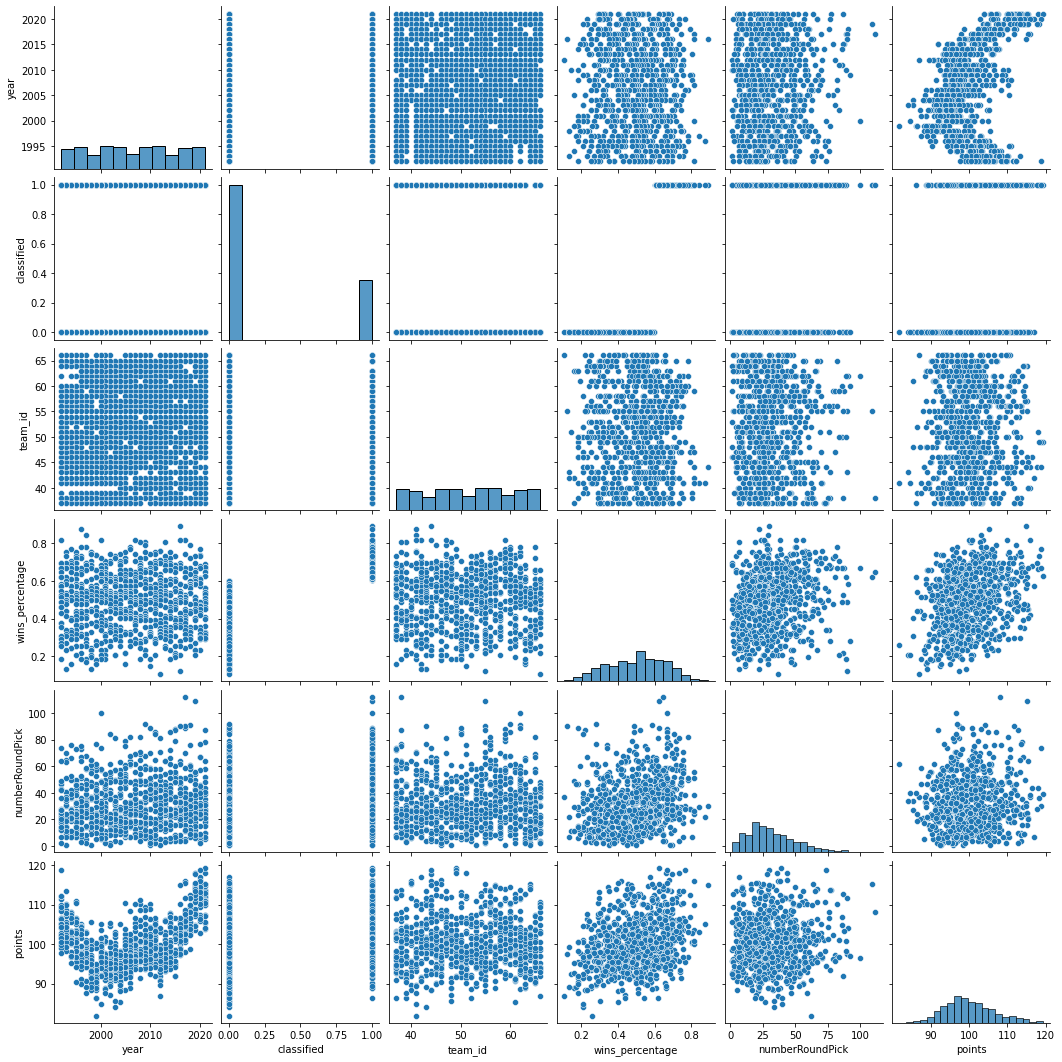

In [ ]:
# sns.pairplot(df[['year','team_id', 'win', 'wins_percentage', 'numberRoundPick', 'points']],corner=True)
sns.pairplot(df[['year', 'classified', 'team_id', 'wins_percentage', 'numberRoundPick', 'points']])


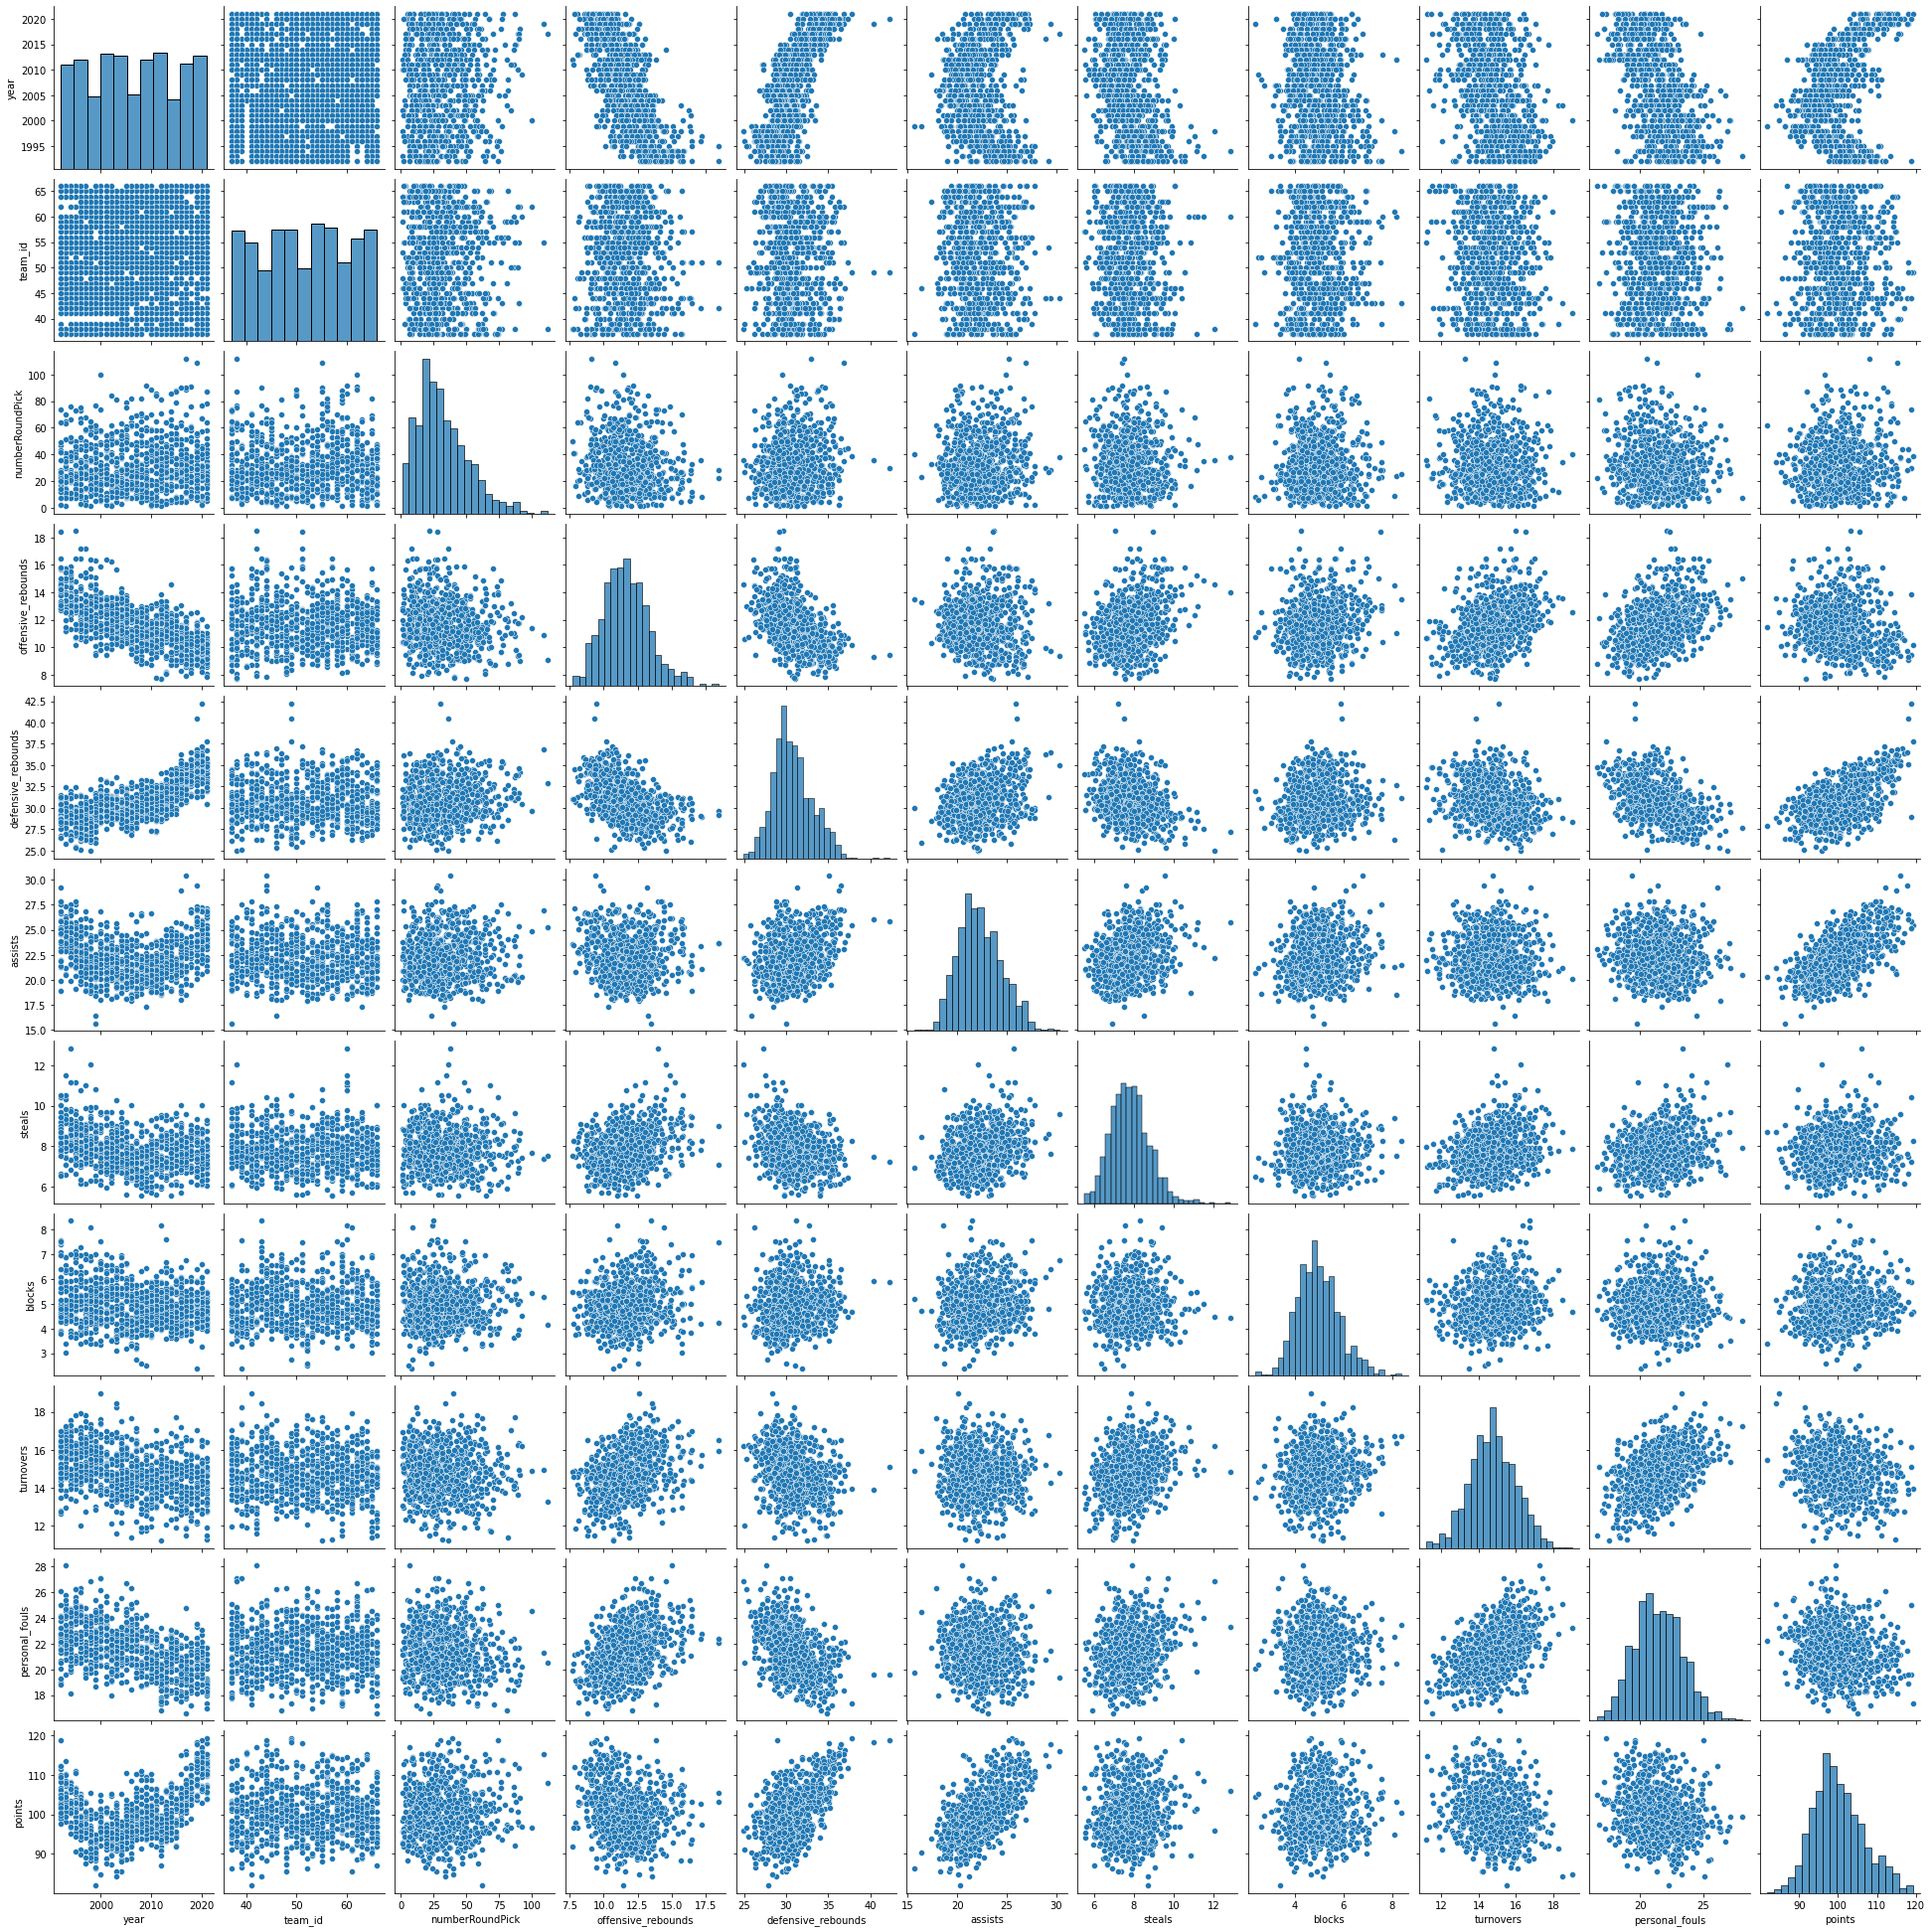

In [ ]:
sns.pairplot(df[['year', 'team_id', 'numberRoundPick','offensive_rebounds', 'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points']])

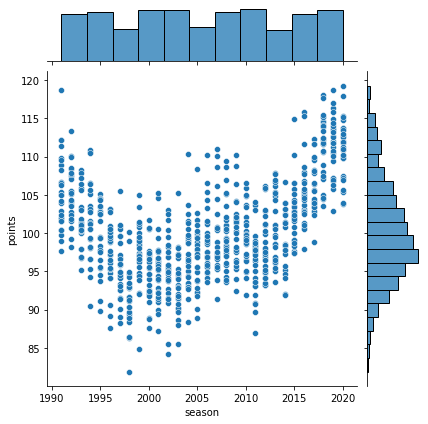

In [ ]:
sns.jointplot(data=df, x="season", y="points")

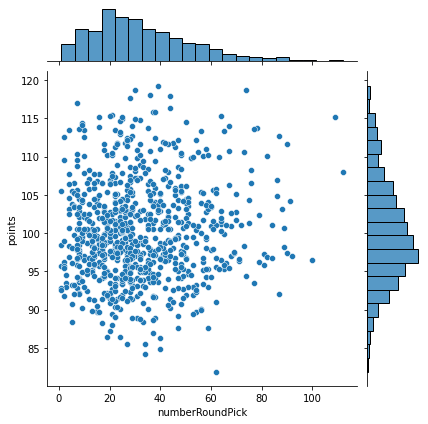

In [ ]:
sns.jointplot(data=df, x="numberRoundPick", y="points")

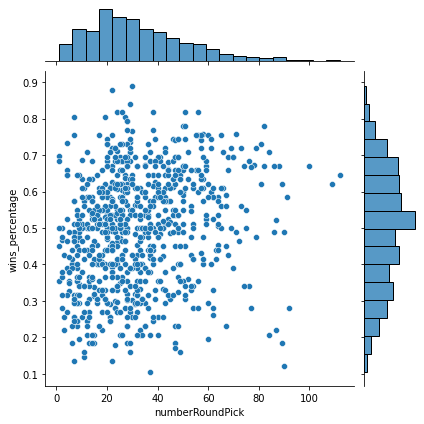

In [ ]:
sns.jointplot(data=df, x="numberRoundPick", y="wins_percentage")

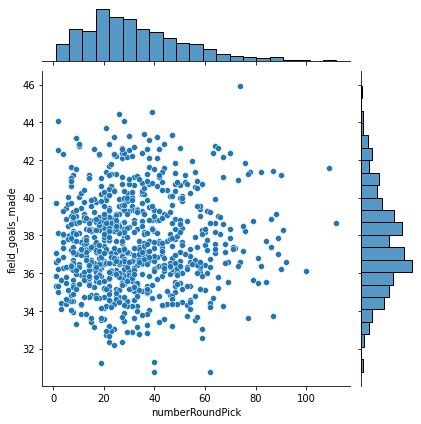

In [ ]:
sns.jointplot(data=df, x="numberRoundPick", y="field_goals_made")

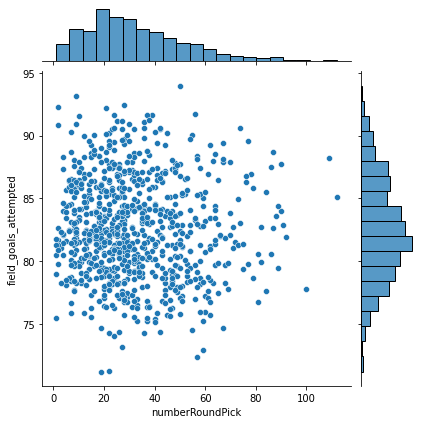

In [ ]:
sns.jointplot(data=df, x="numberRoundPick", y="field_goals_attempted")

In [ ]:
df = df.drop(columns=['team_name'])


Se realizó drop de estas columnas, ya que eran innecesarias

In [ ]:
df.head()


,year,season,team_id,win,game_played,wins_percentage,classified,field_goals_made,field_goals_attempted,field_goals_percentage,three_point_field_goals_made,three_point_field_goals_attempted,three_point_field_goals_percentage,free_throws_made,free_throws_attempted,free_throws_percentage,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,numberRoundPick
0,2021,2020,56,44,64,0.687500,1,42.750000,87.203125,0.492172,12.875000,34.281250,0.376234,15.093750,18.250000,0.832016,8.609375,33.984375,26.671875,7.093750,4.234375,12.718750,18.968750,113.468750,10
1,2021,2020,51,43,65,0.661538,1,42.861538,87.200000,0.491077,14.046154,36.184615,0.382615,18.138462,22.384615,0.807585,9.092308,35.092308,26.523077,6.646154,5.076923,13.661538,18.876923,117.907692,44
2,2021,2020,55,43,64,0.671875,1,41.375000,86.984375,0.476125,11.109375,29.937500,0.374797,19.828125,26.000000,0.762422,10.203125,35.203125,23.359375,9.125000,6.343750,14.671875,20.359375,113.687500,78
3,2021,2020,62,43,64,0.671875,1,40.203125,86.171875,0.468906,16.406250,42.234375,0.388781,16.937500,21.281250,0.792203,10.265625,36.796875,23.109375,6.359375,5.265625,13.812500,18.343750,113.750000,35
4,2021,2020,46,42,65,0.646154,1,41.107692,85.415385,0.481169,14.107692,33.907692,0.417215,15.784615,18.876923,0.834585,9.369231,34.123077,23.907692,6.907692,4.000000,12.800000,19.107692,112.107692,27


### dividir training test

In [ ]:
#entrenamiento
tg = df['classified']
tf = df[['year', 'team_id', 'wins_percentage', 'numberRoundPick', 'points']]

tf.head()

,year,team_id,wins_percentage,numberRoundPick,points
0,2021,56,0.687500,10,113.468750
1,2021,51,0.661538,44,117.907692
2,2021,55,0.671875,78,113.687500
3,2021,62,0.671875,35,113.750000
4,2021,46,0.646154,27,112.107692


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf, tg,  test_size=0.33, random_state=42)

In [ ]:
tf

,year,team_id,wins_percentage,numberRoundPick,points
0,2021,56,0.687500,10,113.468750
1,2021,51,0.661538,44,117.907692
2,2021,55,0.671875,78,113.687500
3,2021,62,0.671875,35,113.750000
4,2021,46,0.646154,27,112.107692
...,...,...,...,...,...
821,1992,64,0.304878,19,102.378049
822,1992,43,0.292683,12,99.707317
823,1992,42,0.268293,20,97.646341
824,1992,53,0.256098,42,101.585366


In [ ]:
sc = preprocessing.StandardScaler()
sc.fit(tf)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_mean = np.mean(X_train.values)
x_mean

438.0357801294245

In [ ]:
y_mean = np.mean(y_train.values)
y_mean

0.28028933092224234

### Linear Regression

In [ ]:
# libreria LinearRegression de sklearn
regression = LinearRegression()
regression.fit(X_train, y_train)

predictions = regression.predict(X_test)

# libreria Lasso de sklearn
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Linear Regression
# Coeficientes
regression.coef_

array([-2.69489734e-03,  6.29916160e-04,  2.13037861e+00,  2.37244913e-03,
        1.13719203e-03])

### MAE

In [ ]:
# MAE
mean_absolute_error(predictions, y_test)


0.2606998328147459

### MSE

In [ ]:
# MSE
mean_squared_error(predictions, y_test)


0.09002967791632491

### RSME

In [ ]:
# RMSE
r2_score(predictions, y_test)

0.3321468198789512

### OLS regression Results

In [ ]:
Xconst = sm.add_constant(X_test.values)
stat = sm.OLS(y_test.values, Xconst)
print(stat.fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     67.26
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.70e-45
Time:                        04:41:01   Log-Likelihood:                -54.753
No. Observations:                 273   AIC:                             121.5
Df Residuals:                     267   BIC:                             143.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1392      4.692     -0.030      0.9

In [ ]:
#lasso
lasso.coef_

array([-0.00547003,  0.        ,  0.        ,  0.00504255,  0.01300399])

In [ ]:
lasso.intercept_

9.793836408066028

###Logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X_test)

### Logistic model report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       199
           1       0.95      0.73      0.82        74

    accuracy                           0.92       273
   macro avg       0.93      0.86      0.88       273
weighted avg       0.92      0.92      0.91       273



### Matriz de confusión


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[196   3]
 [ 20  54]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.head()

,year,season,team_id,win,game_played,wins_percentage,classified,field_goals_made,field_goals_attempted,field_goals_percentage,three_point_field_goals_made,three_point_field_goals_attempted,three_point_field_goals_percentage,free_throws_made,free_throws_attempted,free_throws_percentage,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,numberRoundPick
0,2021,2020,56,44,64,0.687500,1,42.750000,87.203125,0.492172,12.875000,34.281250,0.376234,15.093750,18.250000,0.832016,8.609375,33.984375,26.671875,7.093750,4.234375,12.718750,18.968750,113.468750,10
1,2021,2020,51,43,65,0.661538,1,42.861538,87.200000,0.491077,14.046154,36.184615,0.382615,18.138462,22.384615,0.807585,9.092308,35.092308,26.523077,6.646154,5.076923,13.661538,18.876923,117.907692,44
2,2021,2020,55,43,64,0.671875,1,41.375000,86.984375,0.476125,11.109375,29.937500,0.374797,19.828125,26.000000,0.762422,10.203125,35.203125,23.359375,9.125000,6.343750,14.671875,20.359375,113.687500,78
3,2021,2020,62,43,64,0.671875,1,40.203125,86.171875,0.468906,16.406250,42.234375,0.388781,16.937500,21.281250,0.792203,10.265625,36.796875,23.109375,6.359375,5.265625,13.812500,18.343750,113.750000,35
4,2021,2020,46,42,65,0.646154,1,41.107692,85.415385,0.481169,14.107692,33.907692,0.417215,15.784615,18.876923,0.834585,9.369231,34.123077,23.907692,6.907692,4.000000,12.800000,19.107692,112.107692,27


In [ ]:
tf2 = df[['year', 'team_id', 'numberRoundPick','offensive_rebounds', 'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(tf2, tg,  test_size=0.33, random_state=42)

In [ ]:
mod2 = RandomForestClassifier()
mod2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred2 = mod2.predict(X_test2)

In [ ]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       199
           1       0.78      0.38      0.51        74

    accuracy                           0.80       273
   macro avg       0.79      0.67      0.69       273
weighted avg       0.80      0.80      0.78       273



In [ ]:
 print(confusion_matrix(y_test2, pred2))

[[191   8]
 [ 46  28]]
